# Eve Online Order analysis

In [27]:
import json

import pandas as pd

with open("../orders.json") as file:
    data = json.load(file)

orders = pd.DataFrame(data)

orders.head()

,duration,is_buy_order,issued,location_id,min_volume,order_id,price,range,system_id,type_id,volume_remain,volume_total
0,90,False,2019-08-01T12:27:34Z,60004588,1,5475959262,6.76,region,30002510,34,16507408,30000000
1,90,False,2019-07-30T09:31:12Z,60004588,1,5475840118,6.85,region,30002510,34,10022707,10022707
2,90,False,2019-07-28T20:11:27Z,60004588,1,5474772100,6.84,region,30002510,34,23538,23538
3,90,False,2019-07-29T18:06:20Z,60004588,1,5475405865,6.83,region,30002510,34,26950,26950
4,90,False,2019-07-31T12:09:40Z,60004588,1,5474041662,6.80,region,30002510,34,186520057,201366164


In [28]:
import json

import pandas as pd

with open("../types.json") as file:
    data = json.load(file)

types = pd.DataFrame(data)

Let's see what Type 34 is...

In [29]:
print(types.loc[types["type_id"] == 34]["name"])

30    Tritanium
Name: name, dtype: object


In [30]:
import seaborn as sns
sns.set()

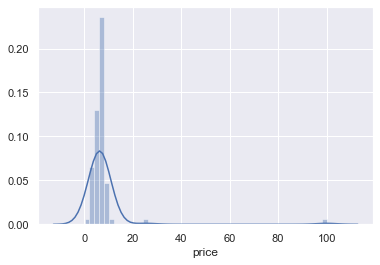

In [31]:
sns.distplot(orders.price)


That's a nice diagram, but we might have some outliers we want to get rid of. We do that by just keeping the once +/- the standard deviation away from the mean.

In [32]:
import numpy as np

o = orders[np.abs(orders.price-orders.price.mean()) <= (orders.price.std())]


Plotting the new data frame gives us a little bit more focus.

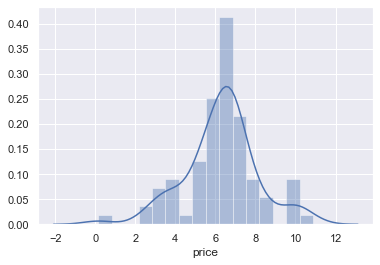

In [37]:
sns.distplot(o.price.dropna())
